# 0. 기본 정보
* 코드 작성자: 문예준, 배은성, 여서연, 이상원
* 코드 작성일: 2024-04-05 ~ 2024-04-06
* 데이터 분석 목적: 연구 주제에 따른 가설 검정 등
* 데이터 출처: [Diabetes Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# 1. 기초 설정

In [ ]:
# 라이브러리 설치
!pip install koreanize_matplotlib
!pip install pdpbox==0.2.0
!pip install fancyimpute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.0-py3-none-any.whl size=57690701 sha256=cbc861af1f220c735439bbe0e6e5efa2e1e3ff81c4229ae384dad25b3b8a13b4
  Stored in directory: /root/.cache/pip/wheels/02/07/20/3167ac76ff2b47abf544ea69195343b572d059e62084f90eab
Successfully built pdpbox
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=a611d592273e7e1dca31fe34c6d03e942feec0d279ecdcab860f6fa66f22a971
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330

In [ ]:
# 사용한 라이브러리

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 열 중간 잘리지 않게 설정

pd.set_option('display.max_columns', None)

In [ ]:
# 데이터 불러오기

data_origin = pd.read_csv('https://drive.google.com/uc?export=download&id=19BgY3-hIHNykXKNNSmDs9ZeSxvZdGmsZ')
data = data_origin.copy()

**데이터 설명**
---
이 데이터셋은 국립 당뇨병 및 소화기 및 신장 질병 연구소에서 제공한 것입니다. <br/>
이 데이터셋의 목적은 환자의 당뇨병 여부를 진단적으로 예측하는 것인데,
데이터셋에 포함된 특정 진단 측정값을 기반으로 당뇨병 여부를 진단적으로 예측하는 것입니다. <br/>
이러한 인스턴스를 선택하는 데 몇 가지 제약이 있었습니다. <br/>
여기서의 모든 환자는 여성이며 최소 21세 이상의 피마 인디언 혈통을 가진 여성입니다.

# 2. 데이터 특성 파악 및 전처리

## 2-1. 기본 특성

In [ ]:
# 출력 예시 확인
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
617,2,68,62,13,15,20.1,0.257,23,0
312,2,155,74,17,96,26.6,0.433,27,1
557,8,110,76,0,0,27.8,0.237,58,0
24,11,143,94,33,146,36.6,0.254,51,1
289,5,108,72,43,75,36.1,0.263,33,0
343,5,122,86,0,0,34.7,0.290,33,0
418,1,83,68,0,0,18.2,0.624,27,0
282,7,133,88,15,155,32.4,0.262,37,0
742,1,109,58,18,116,28.5,0.219,22,0
105,1,126,56,29,152,28.7,0.801,21,0


In [ ]:
# 컬럼 리스트
data_cols = list(data.columns)
data_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

**컬럼 설명**
---
* Pregnancies : 임신횟수
* Glucose : 내당능 검사에서 2시간 후의 혈장 포도당 농도
* Bloodpressure : 혈압
* skinThickness : 삼두근 피부 두께
* insulin : 2시간 혈청 인슐린
* BMI : BMI
* DiabetesPedigreeFunction : 당뇨병 혈통 함수
* age : 나이
* outcome: 0 = 건강(Negative), 1은 당뇨(Positive)

In [ ]:
# 변수 타입
data_types = data.dtypes
qual_vari = data_types[data_types == 'object'].index.tolist()
quant_vari = data_types[data_types != 'object'].index.tolist()

print("질적 변수:", qual_vari)
print()
print("양적 변수:", quant_vari)

질적 변수: []

양적 변수: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


## 2-2. 질적 변수

## 2-3. 결측치

In [ ]:
# 기술통계량
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


글루코스, 인슐린, bmi, 혈압, 피부두께에서 0값 처리가 가장 큰 관건 <br/>
컬럼수가 많지 않기 때문에 그 행을 모두 제거하는 것은 옳지 않음

In [ ]:
# 0값을 결측치로 간주
much_zero_cols = ['BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Glucose','Age']
data[much_zero_cols]=data[much_zero_cols].replace(0, np.nan)

In [ ]:
# 결측치 수와 비율 계산
missing_count = data.isnull().sum()
missing_ratio = round(missing_count / len(data) * 100, 2)

# 결측치 수와 비율 출력
missing_info = pd.concat([missing_count, missing_ratio], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(missing_info)

                          결측치 수  결측치 비율 (%)
Pregnancies                   0        0.00
Glucose                       5        0.65
BloodPressure                35        4.56
SkinThickness               227       29.56
Insulin                     374       48.70
BMI                          11        1.43
DiabetesPedigreeFunction      0        0.00
Age                           0        0.00
Outcome                       0        0.00


혈압, 글루코스, bmi는 결측률이 작은 반면, 피부두께와 인슐린은 매우 높아서 신중하게 처리해야 할 듯

In [ ]:
# 결측률이 작은 것은 평균으로 대체 - 글루코스, BMI, 혈압
data['Glucose']=data.Glucose.fillna(data.Glucose.mean())
data['BMI']=data.BMI.fillna(data.BMI.mean())
data['BloodPressure']=data.BloodPressure.fillna(data.BloodPressure.mean())

data[['Glucose', 'BMI', 'BloodPressure']].isna().sum()

Glucose          0
BMI              0
BloodPressure    0
dtype: int64

**결측 비율 높은 컬럼 보간 방법 선정**
---
1. 피부두께: 다중선형회귀모델
<br/>WHY? 각자 시행해본 다양한 방법 중 큰 차이가 나지 않았고, 가장 이해하기 쉬운  방법 채택
    
2. 인슐린: MICE
<br/>WHY? 다양한 모델링 결과 중 음수값이 가장 적게 나온 방법 채택

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.100239,0.082171,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.227378,0.580347,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.226691,0.098272,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.100239,0.227378,0.226691,1.000000,0.184888,0.647932,0.115016,0.166816,0.259491
Insulin,0.082171,0.580347,0.098272,0.184888,1.000000,0.228082,0.130395,0.220261,0.303454
BMI,0.021565,0.230941,0.281268,0.647932,0.228082,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.115016,0.130395,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.166816,0.220261,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.259491,0.303454,0.311924,0.173844,0.238356,1.000000


In [ ]:
#피부두께 다중선형회귀모형 적합
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

x = data.dropna(axis = 0)[['Glucose','BMI','BloodPressure']] #피부두께와 상관관계가 높은 TOP 3
y = data.dropna(axis = 0)['SkinThickness']
lin_reg_model = lin_reg.fit(x,y)

y_pred_2 = lin_reg_model.predict(data.loc[:,['Glucose','BMI','BloodPressure']])
data['SkinThickness'].fillna(pd.Series(y_pred_2.flatten()),inplace = True)
data['SkinThickness'].describe()

count    768.000000
mean      28.696193
std        9.560586
min        7.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [ ]:
# MICE 다중대치법
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer() #베이지안회귀로 결측치를 대체
df_mice = mice_imputer.fit_transform(data)
df_mice = pd.DataFrame(df_mice)
df_mice.columns = data_cols
df_mice

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,219.022187,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,70.387426,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,20.741411,267.687811,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,158.474311,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,26.087828,173.188354,30.1,0.349,47.0,1.0


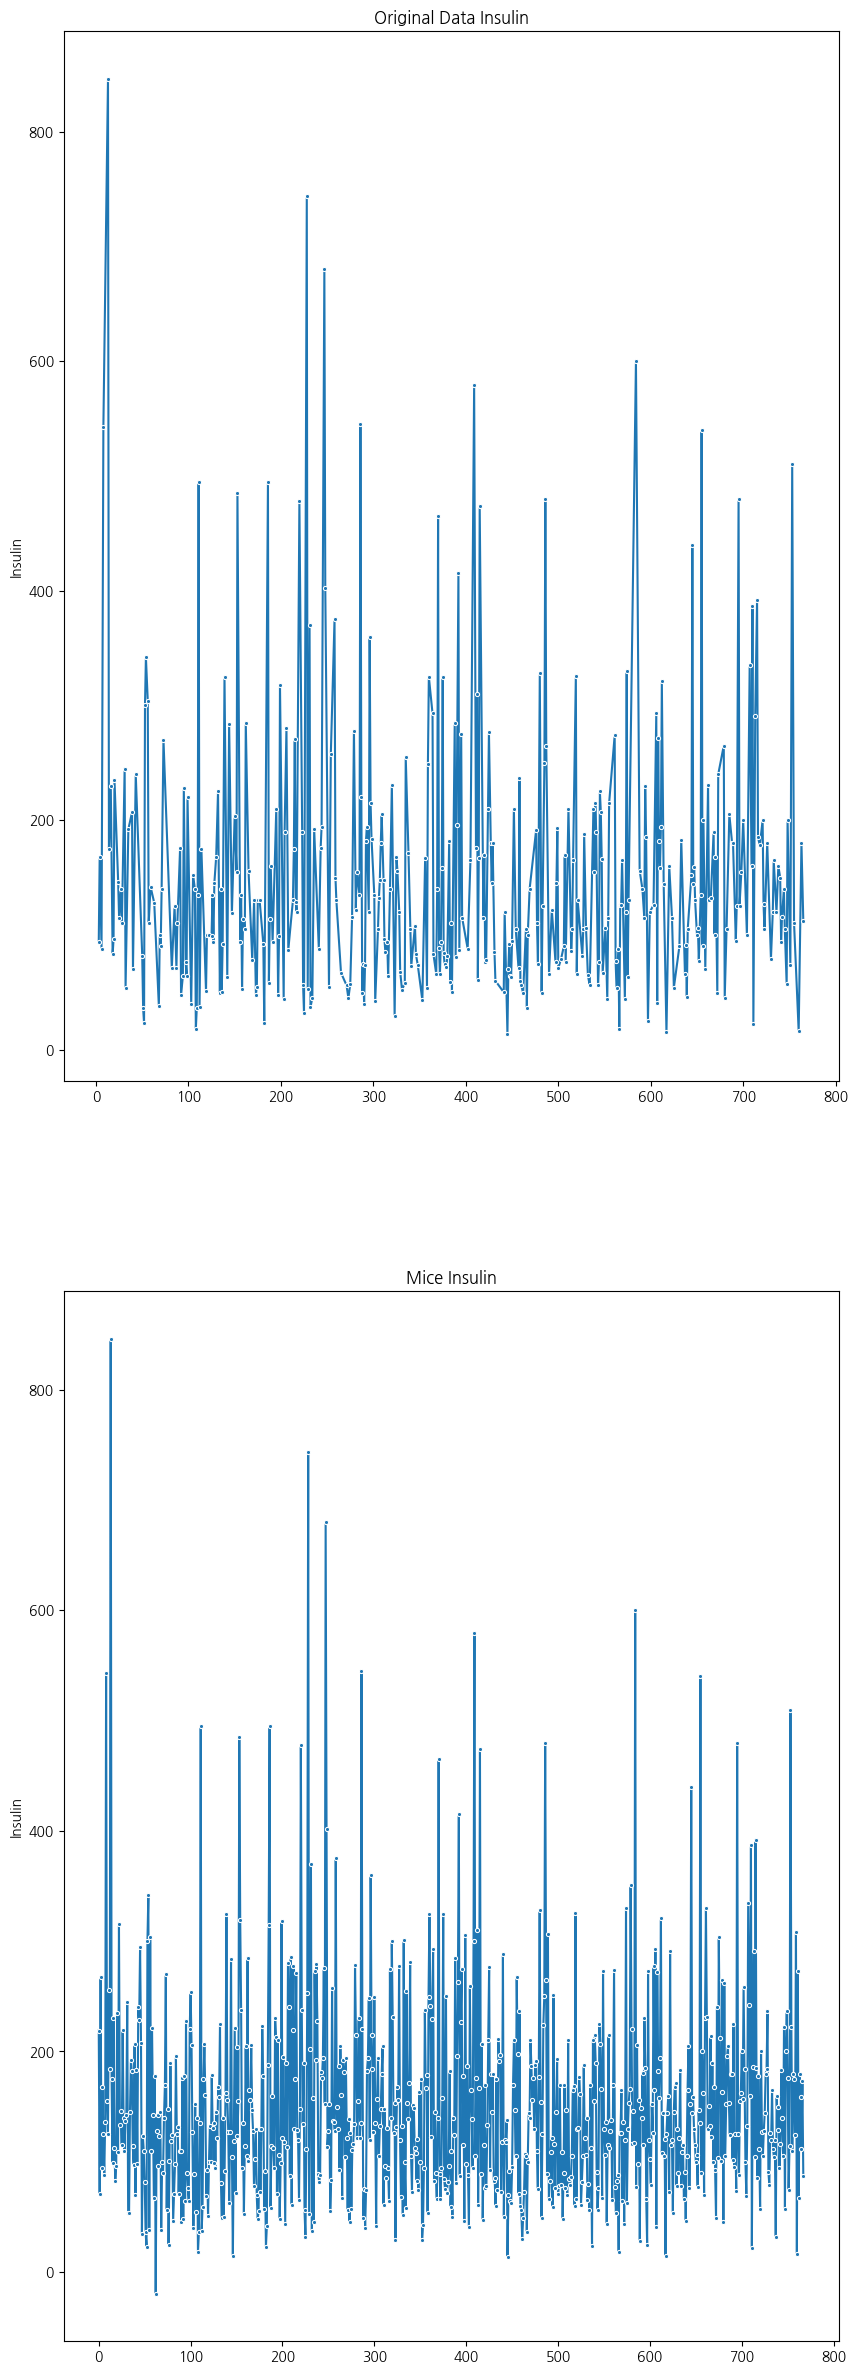

In [ ]:
# Insulin 보간 후 시각화
fig, axes = plt.subplots(2,1,figsize=(10,30))

sns.lineplot(data=data['Insulin'], marker='.', ax=axes[0], legend='auto')
axes[0].set_title('Original Data Insulin')
sns.lineplot(data=df_mice['Insulin'], marker='.', ax=axes[1], legend='auto')
axes[1].set_title('Mice Insulin')
plt.show()

In [ ]:
def SummarizeColumnStats(df_list, column_name, column_names):
    df_desc_list = []
    for df, col_name in zip(df_list, column_names):
        desc = df[column_name].describe().round(2)
        df_desc_list.append(desc)

    df_summary = pd.concat(df_desc_list, axis=1)

    df_summary.columns = [f'{col}_{column_name}' for col in column_names]

    return df_summary

In [ ]:
# 기술통계 비교
SummarizeColumnStats([data, df_mice], 'Insulin', ['origin', 'mice'])

,origin_Insulin,mice_Insulin
count,394.00,768.00
mean,155.55,152.56
std,118.78,97.32
min,14.00,-19.47
25%,76.25,89.47
50%,125.00,130.53
75%,190.00,189.71
max,846.00,846.00


In [ ]:
# 결측치 보간
data['Insulin'] = df_mice['Insulin']
data = data[data['Insulin'] >= 0] #보간값이 음수인 컬럼 삭제

In [ ]:
# 결측치 수와 비율 계산
missing_count = data.isnull().sum()
missing_ratio = round(missing_count / len(data) * 100, 2)

# 결측치 수와 비율 출력
missing_info = pd.concat([missing_count, missing_ratio], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(missing_info)

                          결측치 수  결측치 비율 (%)
Pregnancies                   0         0.0
Glucose                       0         0.0
BloodPressure                 0         0.0
SkinThickness                 0         0.0
Insulin                       0         0.0
BMI                           0         0.0
DiabetesPedigreeFunction      0         0.0
Age                           0         0.0
Outcome                       0         0.0


## 2-4. 이상치 점검

### (1) 함수 설정
**GetOutlier**: IQR을 통해 이상치를 추출<br>
* df: csv파일 등에서 불러온 데이터 프레임<br>
* col: 사용하고자 하는 <u>수치형</u> 컬럼 이름<br>
* weight: 가중치, 기본값은 1.5

In [ ]:
def GetOutlier(df, col, weight=1.5):
    outlier_list = []
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    for i in df[col]:
        if i > Q3 + weight*IQR :
            outlier_list.append(i)
        if i < Q1 - weight*IQR :
            outlier_list.append(i)

    cnt_outlier = len(outlier_list)
    uniq_outlier = list(set(outlier_list)) #고유값만 출력

    if len(outlier_list) == 0:
        print(col, '이상치 없음')

    else:
        print(col, '이상치:', np.sort(uniq_outlier))

### (2) 이상치 시각화

In [ ]:
# list 형식
for numeric in quant_vari:
    GetOutlier(data, numeric)

Pregnancies 이상치: [14 15 17]
Glucose 이상치 없음
BloodPressure 이상치: [ 24.  30.  38. 106. 108. 110. 114. 122.]
SkinThickness 이상치: [56. 60. 63. 99.]
Insulin 이상치: [342.         350.53292491 360.         370.         375.
 387.         392.         402.         415.         440.
 465.         474.         478.         480.         485.
 495.         510.         540.         543.         545.
 579.         600.         680.         744.         846.        ]
BMI 이상치: [52.3 52.9 53.2 55.  57.3 59.4 67.1]
DiabetesPedigreeFunction 이상치: [1.213 1.222 1.224 1.251 1.258 1.268 1.282 1.292 1.318 1.321 1.353 1.39
 1.391 1.394 1.4   1.441 1.461 1.476 1.6   1.698 1.699 1.731 1.781 1.893
 2.137 2.288 2.329 2.42 ]
Age 이상치: [67 68 69 70 72 81]
Outcome 이상치 없음


In [ ]:
# subplot 행렬 차원 계산
target_cols = ['Pregnancies'] + quant_vari[2:-1]
box_lists = len(target_cols)
box_rows = int(box_lists ** 0.5)  # 제곱근을 정수로 변환하여 가장 가까운 값으로 설정
box_cols = (box_lists + box_rows - 1) // box_rows  # 가장 가까운 값을 사용하여 열 개수 계산

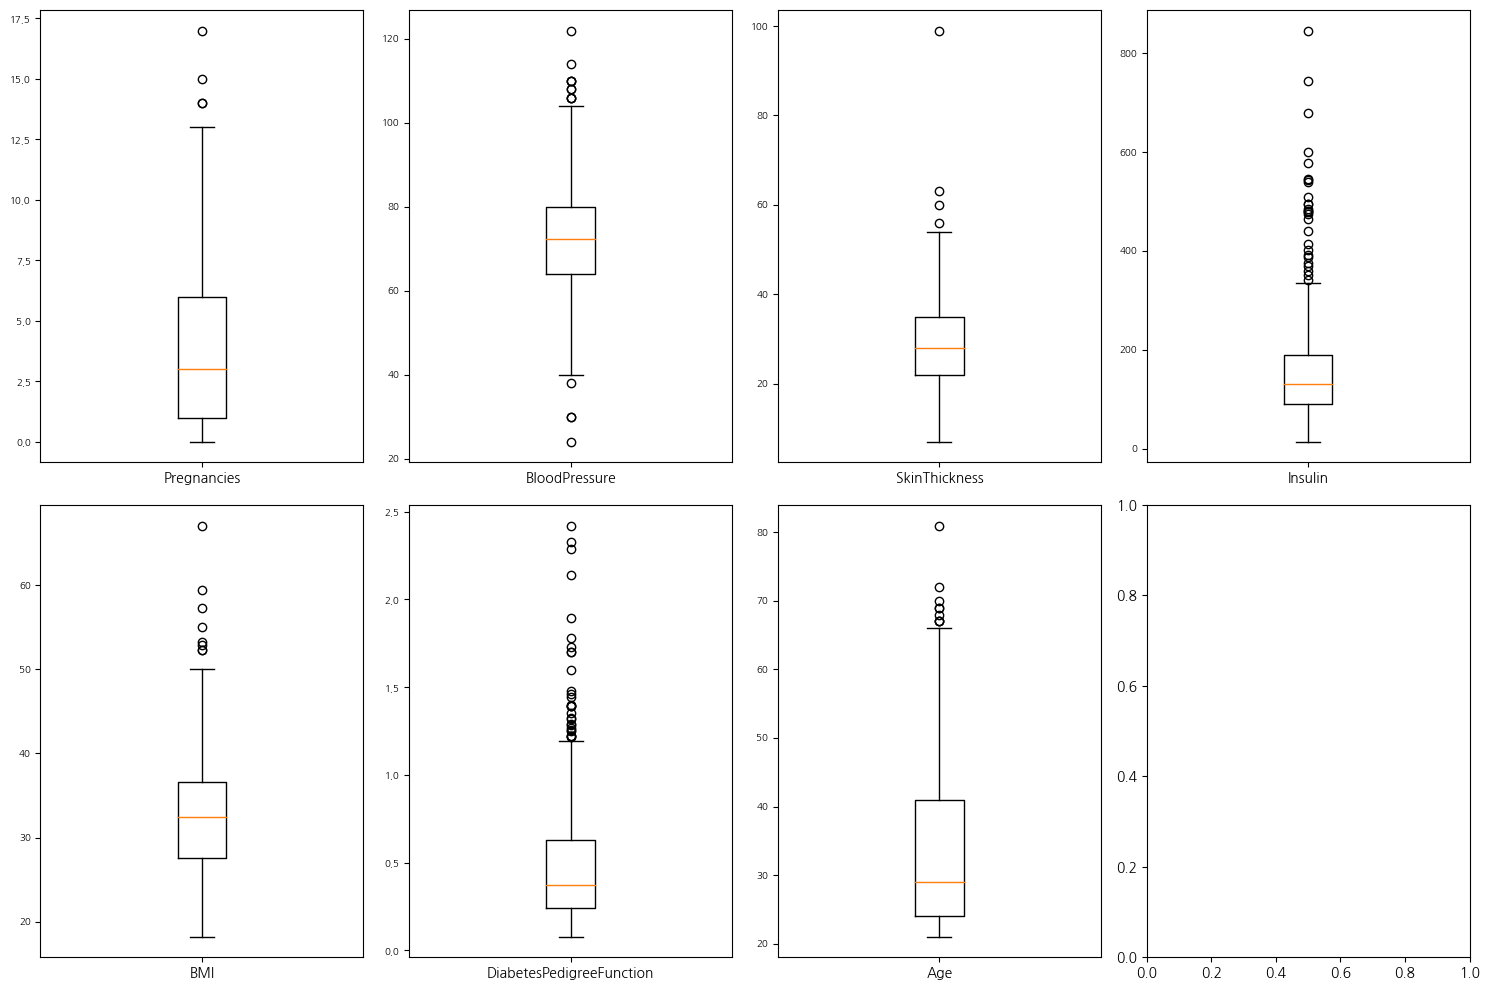

In [ ]:
# Boxplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    ax.boxplot(data[col])
    ax.set_xticklabels([col], fontsize=10)
    ax.set_xlabel('')
    ax.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

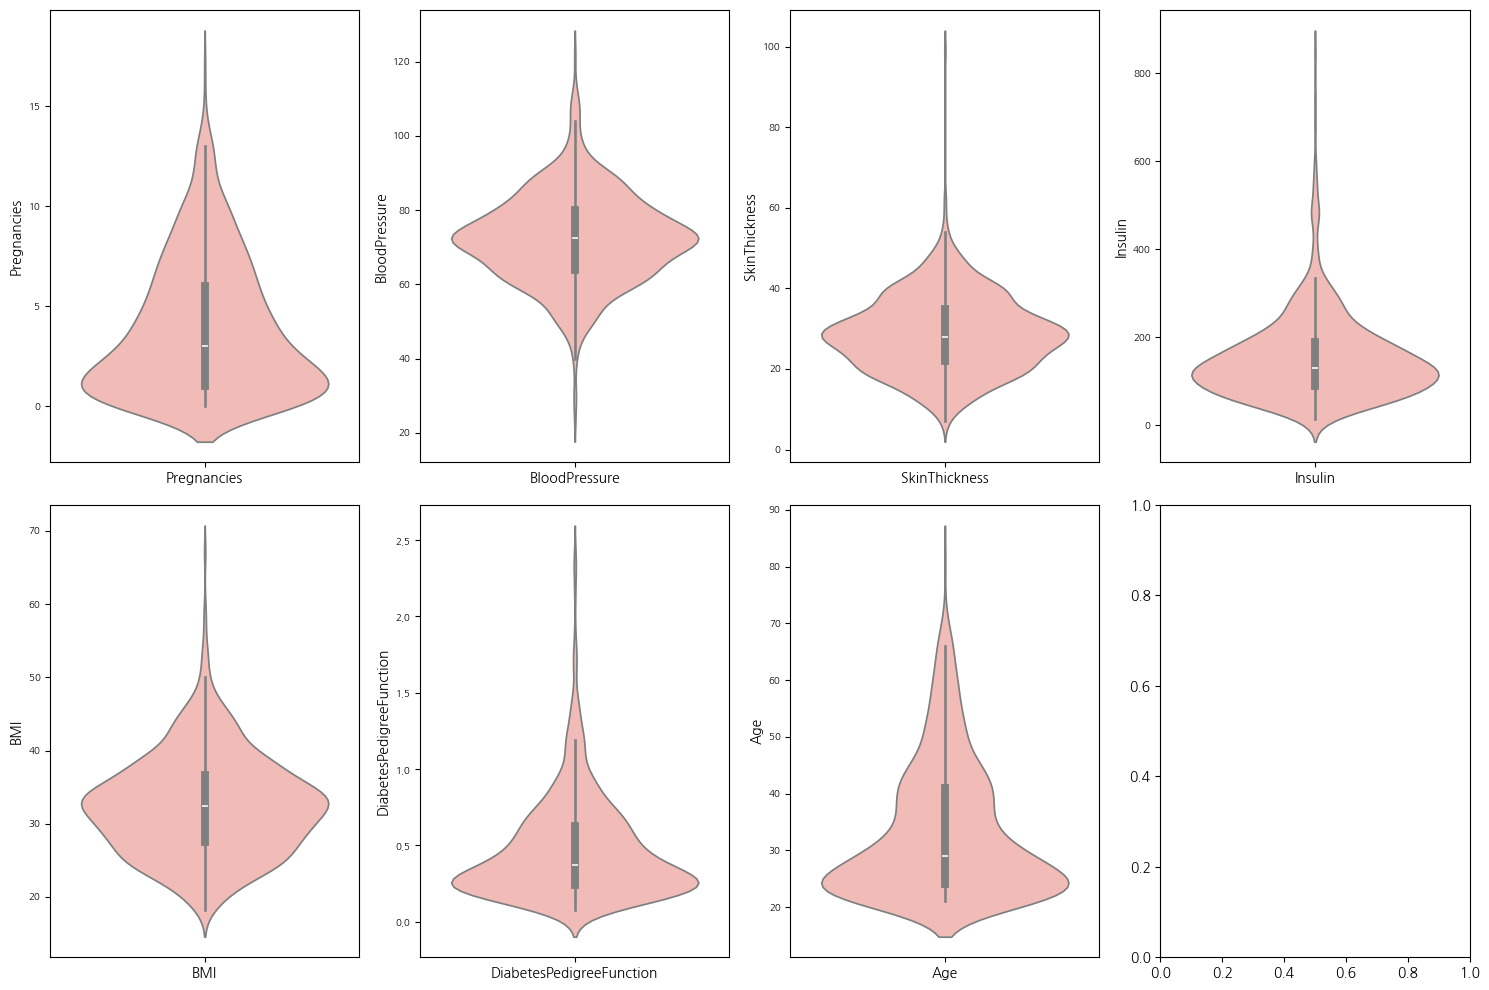

In [ ]:
# Violinplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10)) #boxplot와 동일한 대상

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    sns.violinplot(data=data[col], palette='Pastel1', ax=ax)
    ax.set_xticks([0])  # 바이올린 플롯의 x 축 라벨 설정
    ax.set_xticklabels([col], fontsize=10)
    ax.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

In [ ]:
# SkinThickness가 99인데 BMI가 34.7이라 이상치라 판단
data[data['SkinThickness'] == 99]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197.0,70.0,99.0,350.532925,34.7,0.575,62,1


In [ ]:
# SkinThickness와 BMI 상관관계를 봤을때 BMI가 59.4을 넘어가면 이상치라 판단
# -> (BMI == 67.1은 제거, SkinThickness가 50보다 넘지 않기 때문)
data[data['SkinThickness'] > 50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100.0,88.0,60.0,110.000000,46.8,0.962,31,0
86,13,106.0,72.0,54.0,131.255681,36.6,0.178,45,0
99,1,122.0,90.0,51.0,220.000000,49.7,0.325,31,1
120,0,162.0,76.0,56.0,100.000000,53.2,0.759,25,1
211,0,147.0,85.0,54.0,219.228128,42.8,0.375,24,0
275,2,100.0,70.0,52.0,57.000000,40.5,0.677,25,0
445,0,180.0,78.0,63.0,14.000000,59.4,2.420,25,1
532,1,86.0,66.0,52.0,65.000000,41.3,0.917,29,0
579,2,197.0,70.0,99.0,350.532925,34.7,0.575,62,1


In [ ]:
# 생물학적으로 비정상
data[data['BloodPressure'] < 40]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
597,1,89.0,24.0,19.0,25.0,27.8,0.559,21,0
599,1,109.0,38.0,18.0,120.0,23.1,0.407,26,0


### (3) 이상치 제거

**따로 제거할 컬럼**
* BloodPressure(40 이하는 제거)
* SkinThickness(99 이상은 제거)
* BMI(67.1 이상은 제거)
* Pregnanies & Age
<br/>: IQR 탐지 방식에서 이상치로 간주되는 데이터가 있었으나, 생물학적으로 정상이라 판단하여 제거하지 않음

In [ ]:
# IQR 방식으로 제거
for col in ['Insulin', 'DiabetesPedigreeFunction']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치를 제거할 조건
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [ ]:
# 그외 컬럼 제거
data = data[data['BloodPressure'] >= 40] #혈압이 40 이상인 데이터만 선택
data = data[data['SkinThickness'] != 99] #피부두께가 99가 아닌 데이터만 선택
data = data[data['BMI'] <= 60] #BMI가 60 이하인 데이터만 선택

In [ ]:
# list 형식
for numeric in quant_vari:
    GetOutlier(data, numeric)

Pregnancies 이상치: [14 15 17]
Glucose 이상치: [195. 196. 198.]
BloodPressure 이상치: [106. 108. 110. 114. 122.]
SkinThickness 이상치: [54. 56. 60.]
Insulin 이상치: [318.         319.04030199 321.         325.         326.
 328.         330.         335.        ]
BMI 이상치: [49.7 50.  52.3 52.9 53.2 57.3]
DiabetesPedigreeFunction 이상치: [1.114 1.127 1.136 1.138 1.144 1.154 1.159 1.162 1.174]
Age 이상치: [65 66 67 68 69 70 72 81]
Outcome 이상치 없음


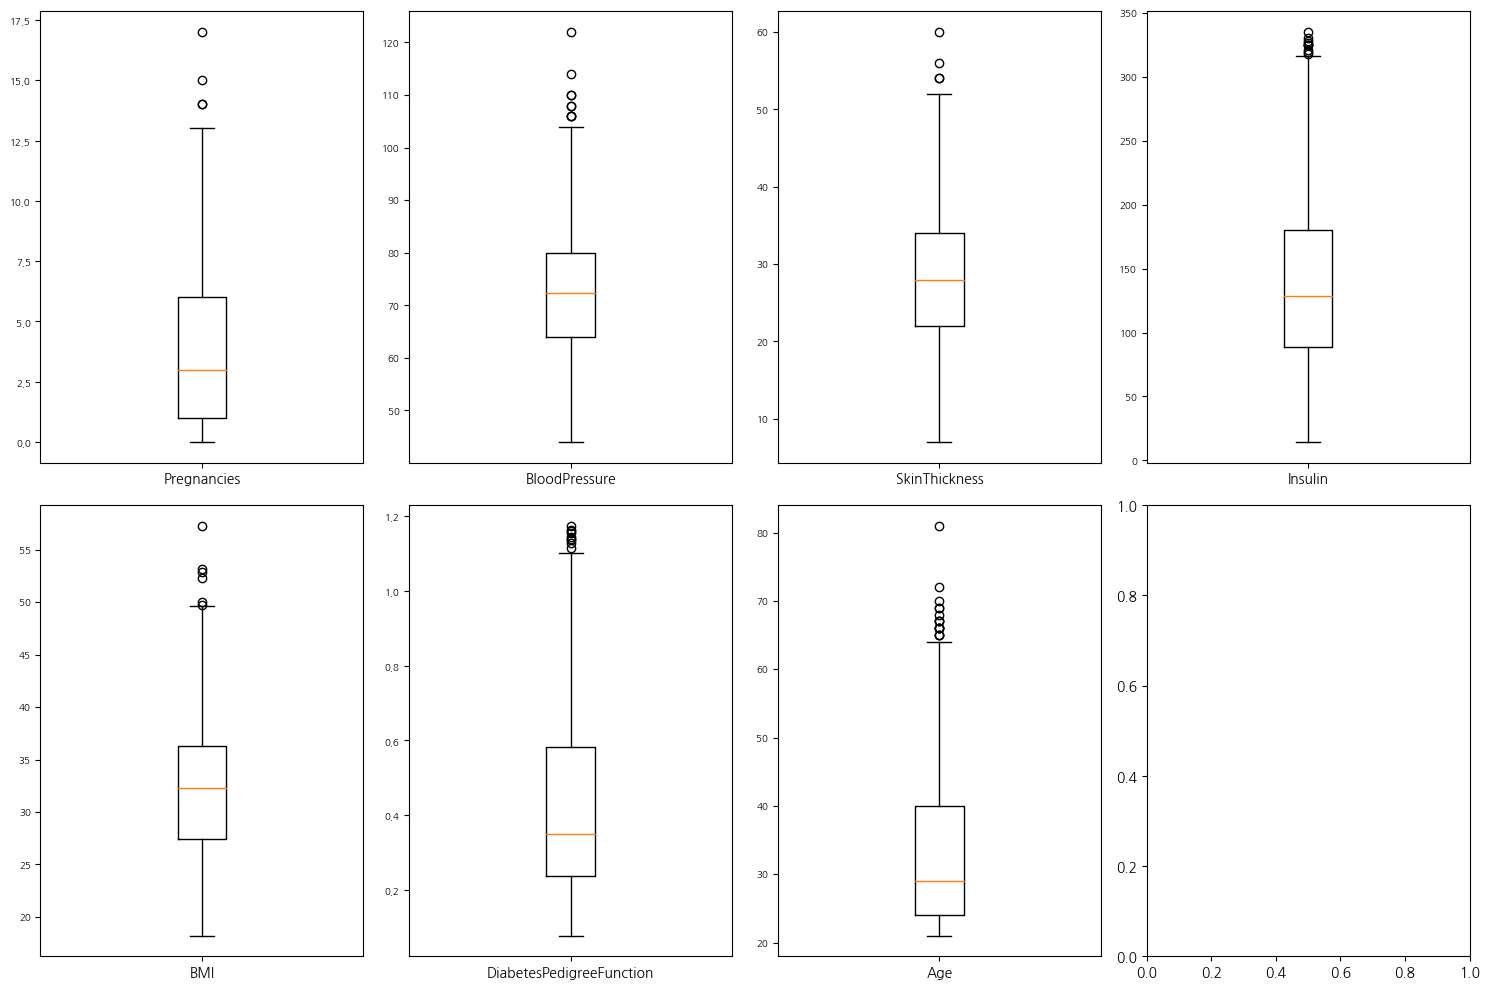

In [ ]:
# Boxplot 형식
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    ax.boxplot(data[col])
    ax.set_xticklabels([col], fontsize=10)
    ax.set_xlabel('')
    ax.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

## 2-5. 양적변수(분포)

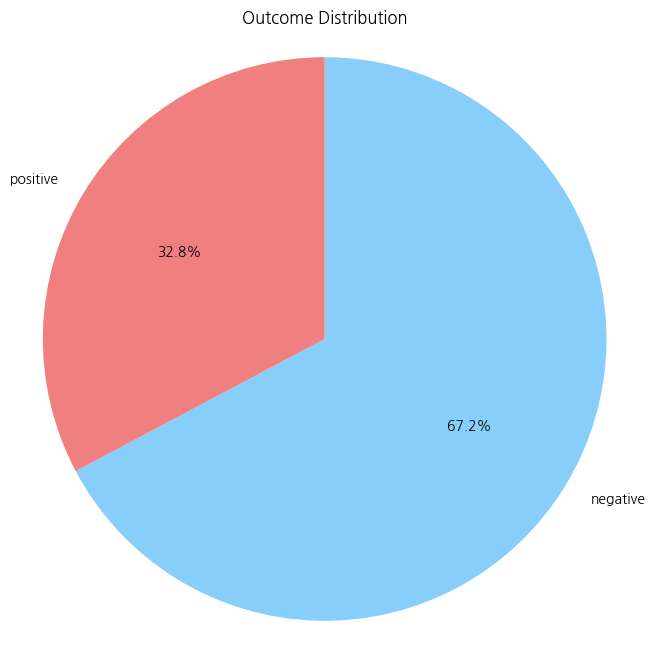

In [ ]:
# Outcome 별 개수 계산
outcome_counts = data['Outcome'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, autopct='%1.1f%%', startangle=90, counterclock=False
        , colors=['lightskyblue', 'lightcoral'], labels=['negative', 'positive'])
plt.title('Outcome Distribution')
plt.axis('equal')
plt.show()

(array([274., 149.,  82.,  81.,  46.,  30.,  22.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

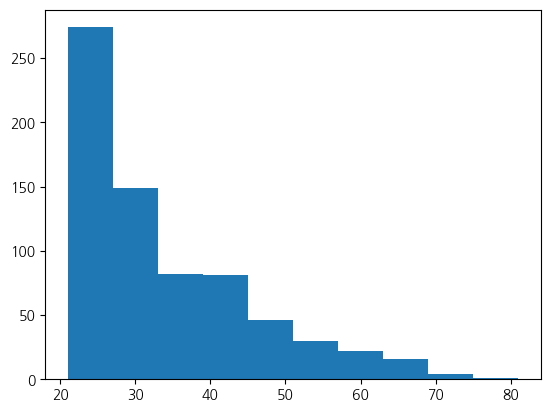

In [ ]:
plt.hist('Age', data = data)

조사한 주 연령층은 20대로 고르게 조사한 것 같지는 않다. <br/>20대가 많은 만큼 20대 당뇨에 대해 깊이있게 분석해보면 좋을것 같다.

In [ ]:
# Outcome이 0 또는 1인 경우를 각각 구분하여 데이터 추출
df_negative = data[data['Outcome'] == 0]
df_positive = data[data['Outcome'] == 1]

In [ ]:
# 컬럼별 당뇨 진단 여부 히스토그램 시각화 함수
def Histogram(column):
  plt.figure(figsize=(10, 6))
  sns.distplot(df_negative[column], color='blue', label='Negative', hist_kws={'alpha': 0.5})
  sns.distplot(df_positive[column], color='red', label='Positive', hist_kws={'alpha': 0.5})
  plt.title(f'Distribution of {column} by Outcome')
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.legend()
  plt.show()

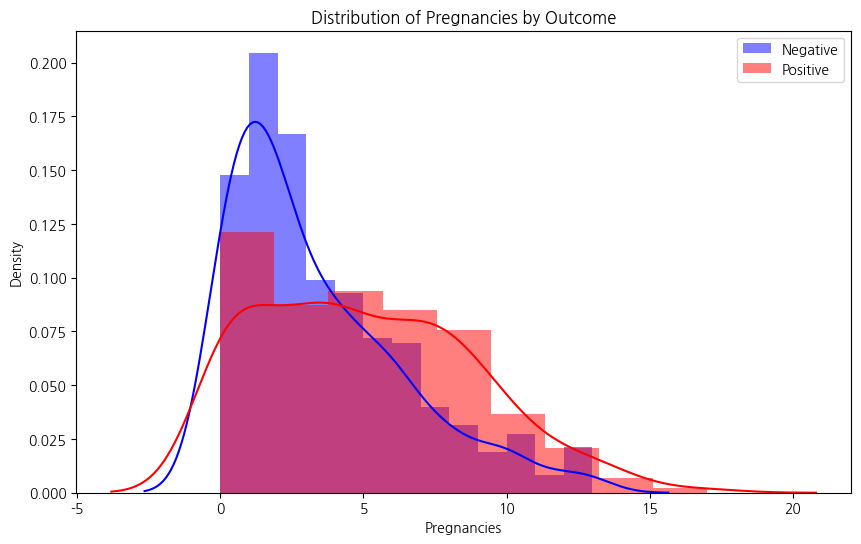

In [ ]:
# 임신횟수
Histogram('Pregnancies')

임신 중기와 후기에는 정상적으로 인슐린 저항성이 증가하는데, 이는 인슐린 작용 효과가 감소한다는 것을 의미합니다. 임신 후기에는 인슐린 작용이 임신 전보다 50 - 70% 감소해, 인슐린 요구량이 임신 전보다 2~3배 증가합니다. 인슐린 저항성은 임신 중 태반에서 생성되는 젖샘자극호르몬, 코르티솔, 프로게스테론, 프로락틴 등의 호르몬 농도 변화, 그리고 임신 중 체지방의 증가와 관계가 있습니다. 정상적으로는 임신 때 증가하는 인슐린 요구량에 맞춰 췌장에서 더 많은 인슐린이 분비되므로 혈당 조절 능력이 나빠지지 않지만, 임신당뇨병이 발생하는 산모는 인슐린 분비가 충분히 증가하지 않아 혈당이 상승합니다.
https://health.kdca.go.kr/healthinfo/biz/health/gnrlzHealthInfo/gnrlzHealthInfo/gnrlzHealthInfoView.do?cntnts_sn=5271

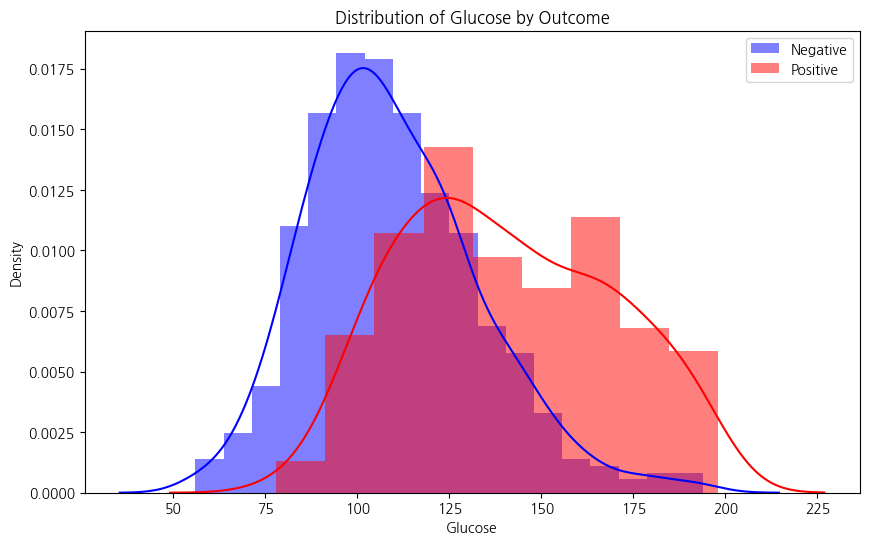

In [ ]:
# 글루코스
Histogram('Glucose')

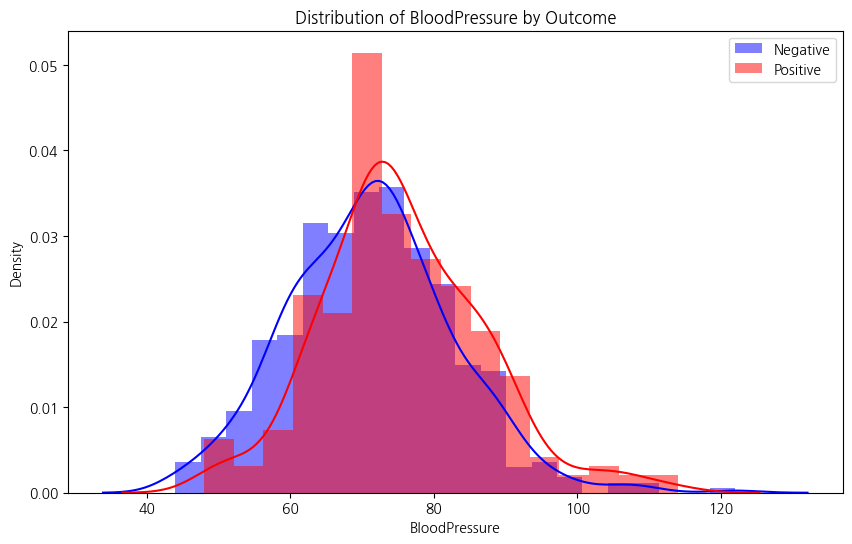

In [ ]:
# 혈압
Histogram('BloodPressure')

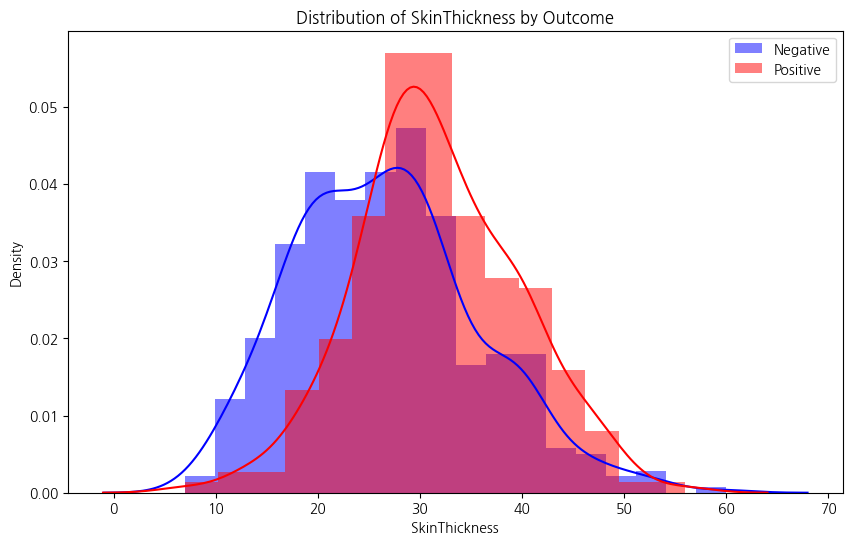

In [ ]:
# 피부두께
Histogram('SkinThickness')

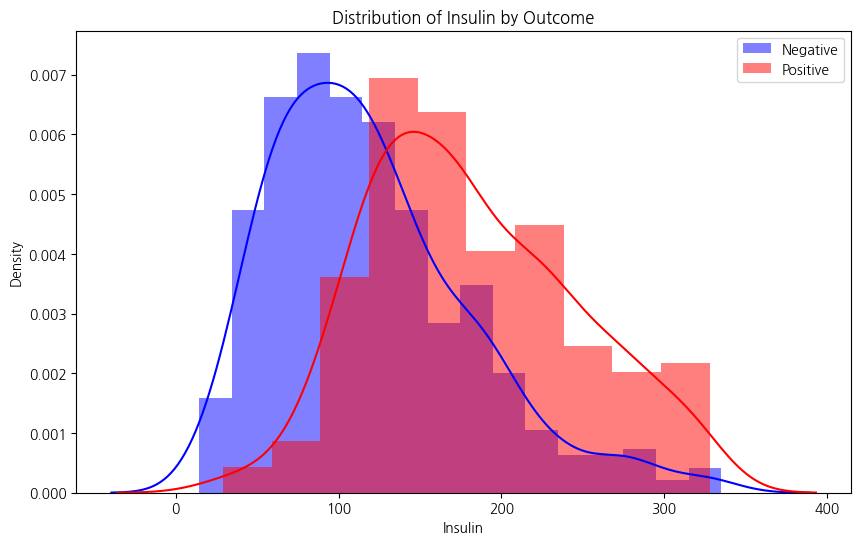

In [ ]:
# 인슐린
Histogram('Insulin')

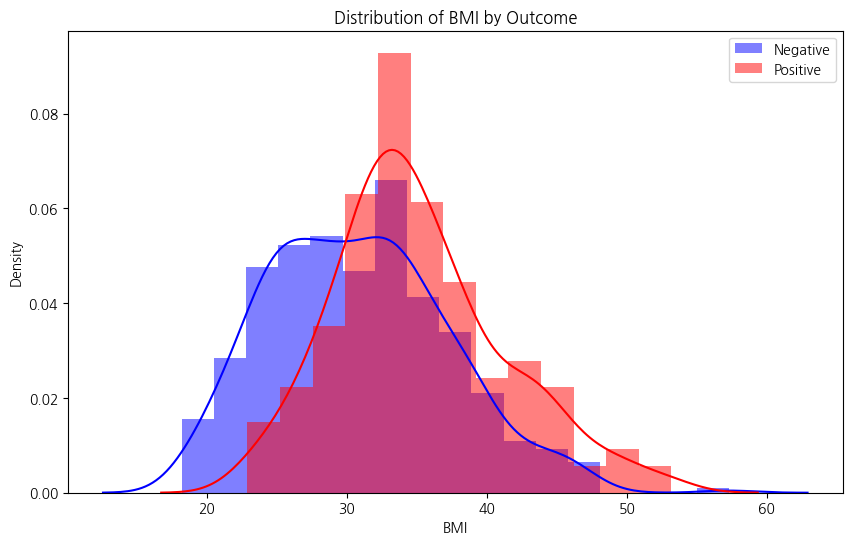

In [ ]:
# BMI
Histogram('BMI')

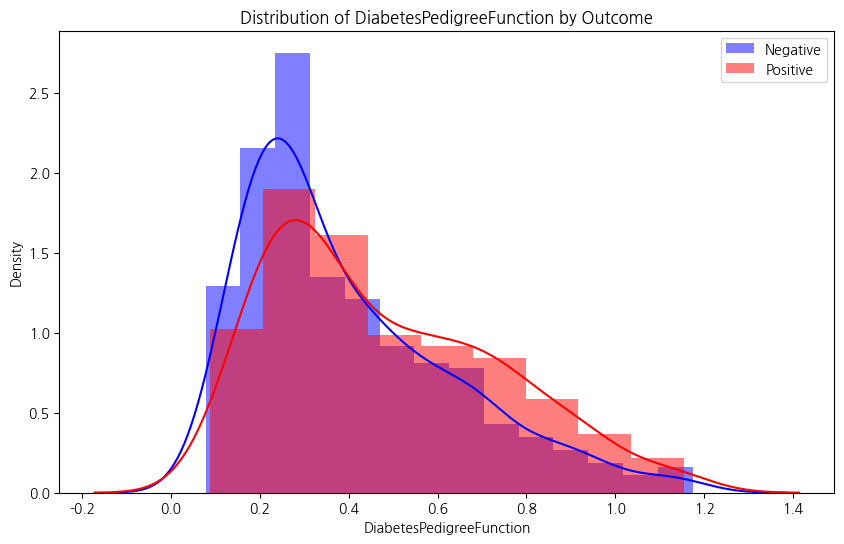

In [ ]:
# 혈통 함수
Histogram('DiabetesPedigreeFunction')

## 2-6. 정규성 검정

In [ ]:
# 표본 크기가 2000 이하이므로 샤피로-윌크 검정 수행
for column in quant_vari:
    print(f"변수 '{column}'의 정규성 검정 결과:")

    # 샤피로-윌크 검정
    shapiro_stat, shapiro_p = stats.shapiro(data[column])
    print(f"샤피로윌크스 검정 - 통계량(statistic): {shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

변수 'Pregnancies'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9064, p-value=0.0000
변수 'Glucose'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9691, p-value=0.0000
변수 'BloodPressure'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9870, p-value=0.0000
변수 'SkinThickness'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9924, p-value=0.0011
변수 'Insulin'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9636, p-value=0.0000
변수 'BMI'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9879, p-value=0.0000
변수 'DiabetesPedigreeFunction'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.9175, p-value=0.0000
변수 'Age'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.8729, p-value=0.0000
변수 'Outcome'의 정규성 검정 결과:
샤피로윌크스 검정 - 통계량(statistic): 0.5919, p-value=0.0000


**추후 비모수 검정 방법을 실시하는 것이 적절하다고 판단함**

# 3. 가설 검증 및 연구

## 3-1. 가설 또는 시각화 주제 설정
---
1. 각 변수별 진단률
2. 당뇨 진단 여부에 따라 혈통 함수에 차이가 생긴다. (맨-휘트니 U 검정)
3-1. 당뇨 진단 여부에 따라 BMI에 차이가 생긴다. (맨-휘트니 U 검정)
3-2. 당뇨 진단 여부에 따라 BMI 일반군/위험군의 비율이 달라진다. (카이제곱 독립성 검정)
4. 각 요인에 따른 당뇨 여부 예측 모델링 (로지스틱 회귀)

## 3-2. 가설 검증 또는 시각화 실행

### 각 변수별 진단률

In [ ]:
def Barplot(column):
  plt.figure(figsize=(12,6))
  sns.barplot(x=column, y = 'Outcome', palette='Blues', data=data)

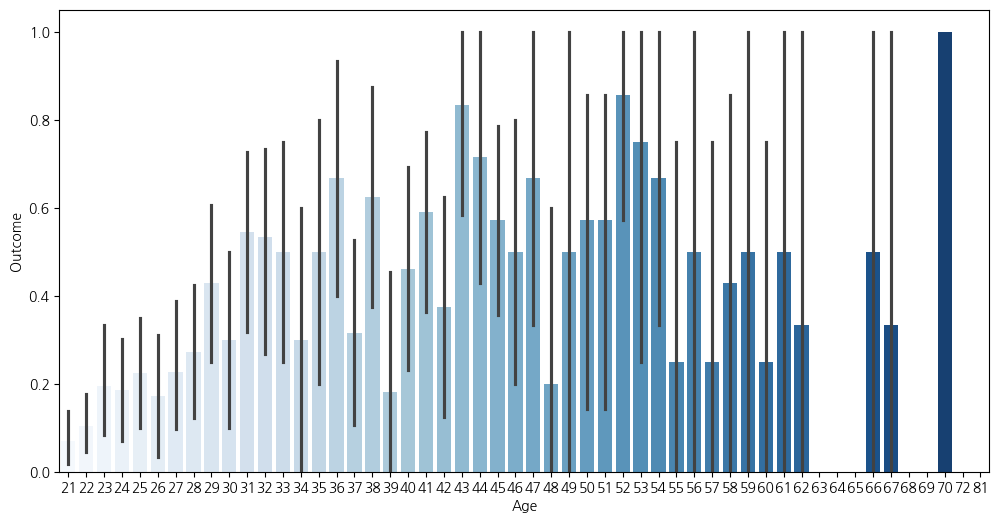

In [ ]:
# 연령
Barplot('Age')

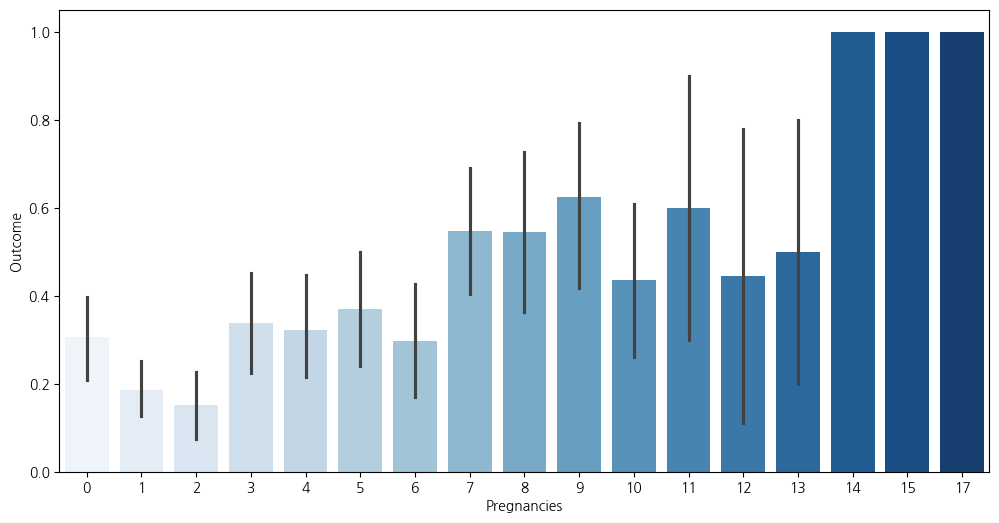

In [ ]:
# 임신횟수
Barplot('Pregnancies')

**▶ 횟수가 많을수록 당뇨병 발병률이 높음**

### 당뇨 진단 여부에 따라 혈통 함수에 차이가 생긴다.
---
맨-휘트니 U 검정 실시

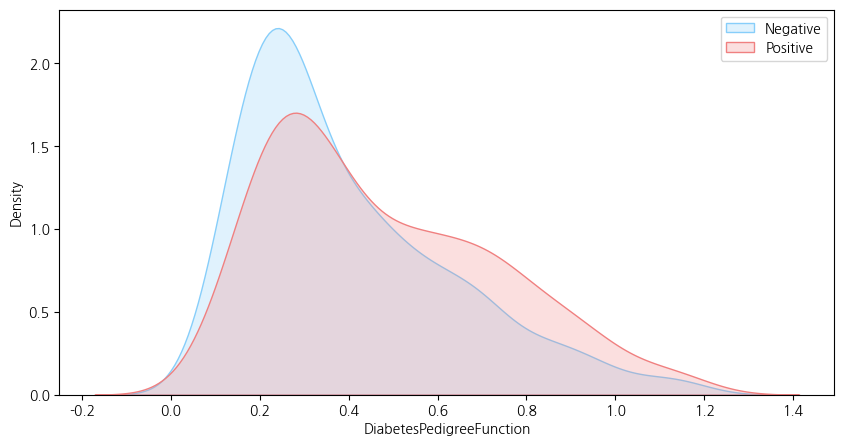

In [ ]:
# 커널 밀도 추정 그래프
plt.figure(figsize=(10, 5))
sns.kdeplot(df_negative['DiabetesPedigreeFunction'], label="Negative", color='lightskyblue', shade=True)
sns.kdeplot(df_positive['DiabetesPedigreeFunction'], label="Positive", color='lightcoral', shade=True)
plt.legend()
plt.show()

In [ ]:
# Levene의 등분산성 검정(비모수 추천)
pos_func = data[data['Outcome']==1]['DiabetesPedigreeFunction']
neg_func = data[data['Outcome']==0]['DiabetesPedigreeFunction']

_, p_value = stats.levene(pos_func, neg_func, center='median') #비모수에서는 median이 더 강력

if p_value > 0.05:
    equal_var = True
    print("등분산성을 만족합니다.")
else:
    equal_var = False
    print("등분산성을 만족하지 않습니다.")

등분산성을 만족하지 않습니다.


In [ ]:
# 맨-휘트니 U 검정 수행
from scipy.stats import mannwhitneyu
u_statistic, p_value = mannwhitneyu(pos_func, neg_func)

# 검정 결과 출력
print(f"U statistic: {u_statistic}")
print(f"P-value: {'%.4f'%p_value}")

U statistic: 65141.0
P-value: 0.0000


p-value=0.0000으로 유의수준 5% 하에서 **귀무가설을 기각**할 수 있다. <br/>
따라서 **당뇨 진단 여부에 따른 혈통 함수에는 유의미한 차이가 있다**고 말할 수 있다.

### 당뇨 진단 여부에 따라 BMI에 차이가 생긴다.
---
맨-휘트니 U 검정

In [ ]:
# Levene의 등분산성 검정(비모수 추천)
pos_bmi = data[data['Outcome']==1]['BMI']
neg_bmi = data[data['Outcome']==0]['BMI']

_, p_value = stats.levene(pos_bmi, neg_bmi, center='median') #비모수에서는 median이 더 강력

if p_value > 0.05:
    equal_var = True
    print("등분산성을 만족합니다.")
else:
    equal_var = False
    print("등분산성을 만족하지 않습니다.")

등분산성을 만족합니다.


In [ ]:
# 맨-휘트니 U 검정 수행
from scipy.stats import mannwhitneyu
u_statistic, p_value = mannwhitneyu(pos_bmi, neg_bmi)

# 검정 결과 출력
print(f"U statistic: {u_statistic}")
print(f"P-value: {'%.4f'%p_value}")

U statistic: 75256.0
P-value: 0.0000


p-value=0.0000으로 유의수준 5% 하에서 **귀무가설을 기각**할 수 있다. <br/>
따라서 **당뇨 진단 여부에 따른 BMI에는 유의미한 차이가 있다**고 말할 수 있다.

### 당뇨 진단 여부에 따라 BMI 일반군/위험군의 비율이 달라진다.
---
카이제곱 독립성 검정 실시

In [ ]:
# BMI 수치에 따른 인원수
others_bmi = (data['BMI'] < 20).sum()
print(f'{others_bmi}명 \t BMI 20 미만')

normal_bmi = ((data['BMI'] < 25) & (data['BMI'] >= 20)).sum()
print(f'{normal_bmi}명 \t 정상')

over_bmi = ((data['BMI'] < 30) & (data['BMI'] >= 25)).sum()
print(f'{over_bmi}명 \t 과체중 (1도비만)')

obesity_bmi = ((data['BMI'] < 40) & (data['BMI'] >= 30)).sum()
print(f'{obesity_bmi}명 \t 비만 (2도비만)')

severeOvesity_bmi = (data['BMI'] >= 40).sum()
print(f'{severeOvesity_bmi}명 \t 고도비만')

13명 	 BMI 20 미만
89명 	 정상
166명 	 과체중 (1도비만)
356명 	 비만 (2도비만)
81명 	 고도비만


In [ ]:
# BMI수치 30을 기준으로 일반군/위험군 구분
dia_bmi = data.copy()
dia_bmi['BMI_danger'] = dia_bmi['BMI'].apply(lambda x: 1 if x >= 30 else 0) #일반군=0, 위험군=1

# 분할표 출력
grouped_data = dia_bmi.groupby('BMI_danger')['Outcome'].value_counts().unstack()
grouped_data

Outcome,0,1
BMI_danger,,
0,227,41
1,247,190


In [ ]:
# 카이제곱 독립성 검정 수행
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(grouped_data)

# 검정 결과 출력
print('Chi-square statistic:', chi2)
print('p-value:', '%.4f'%p)

Chi-square statistic: 58.60872006222319
p-value: 0.0000


p-value=0.0000으로 유의수준 5% 하에서 **귀무가설을 기각**할 수 있다. <br/>
따라서 **당뇨 진단 여부에 따른 BMI 일반군과 위험군  비율에는 유의미한 차이가 있다**고 말할 수 있다.

### 각 요인에 따른 당뇨 여부 예측 모델링
---
로지스틱 회귀

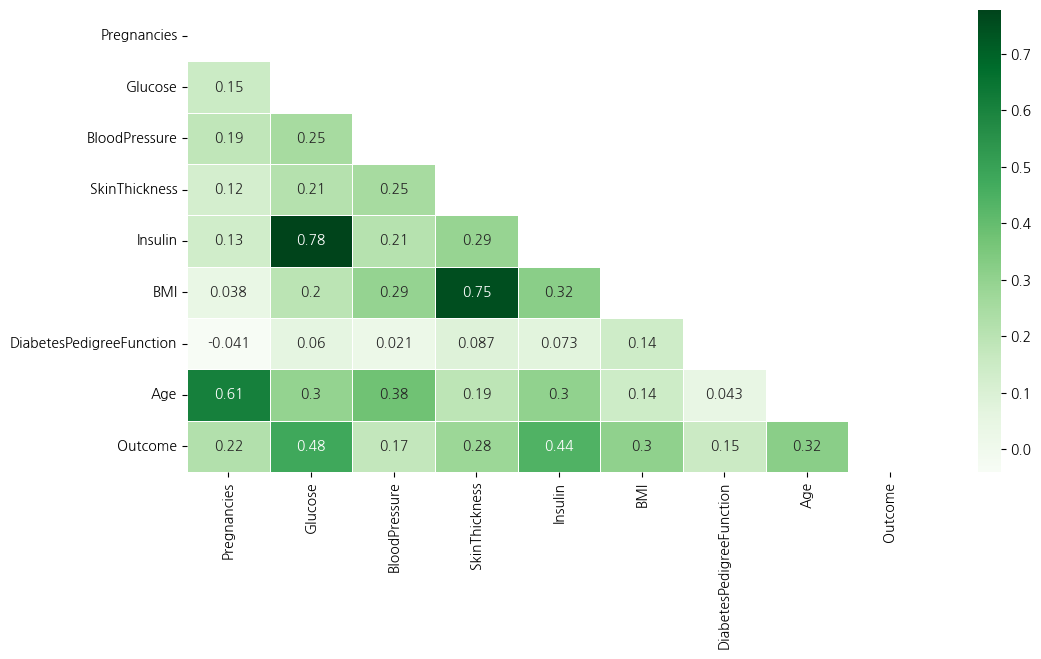

In [ ]:
# 상관관계 히트맵(비모수검정)
plt.figure(figsize=(12, 6))
data_corr = data.corr(method='spearman')
mask = np.triu(np.ones_like(data_corr))
sns.heatmap(data_corr, annot=True, cmap='Greens', mask=mask, linewidths=0.5)
plt.show()

* Glucose - Insulin(0.78): 당 수치가 높을수록 이를 저하시키는 인슐린이 많이 분비될 것
* SkinThickness - BMI(0.75): BMI는 체중으로 계산하므로, 피하지방이 두꺼울수록 자연히 증가할 것
* Age - Pregnancies(0.61): 나이를 먹으면 임신 횟수도 자연히 늘어날 것
* Outcome - Glucose(0.48): 혈중 glucose 농도로 당뇨를 진단하므로 당연한 결과임

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

# 독립 변수와 종속 변수
X = data.iloc[:, :-1]
y = data['Outcome']

In [ ]:
print(X.shape,y.shape)

(705, 8) (705,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)

In [ ]:
def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test,pred)

오차 행렬
[[83 12]
 [26 20]]
정확도: 0.7305, 정밀도: 0.6250, 재현율: 0.4348,    F1: 0.5128, AUC:0.6542


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        95
           1       0.62      0.43      0.51        46

    accuracy                           0.73       141
   macro avg       0.69      0.65      0.66       141
weighted avg       0.72      0.73      0.72       141



In [ ]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

def PDP (column):
  pdp_goals = pdp.pdp_isolate(model=lr_clf, dataset=X_test, model_features=feature_names, feature=column)
  pdp.pdp_plot(pdp_goals, column)
  plt.show()

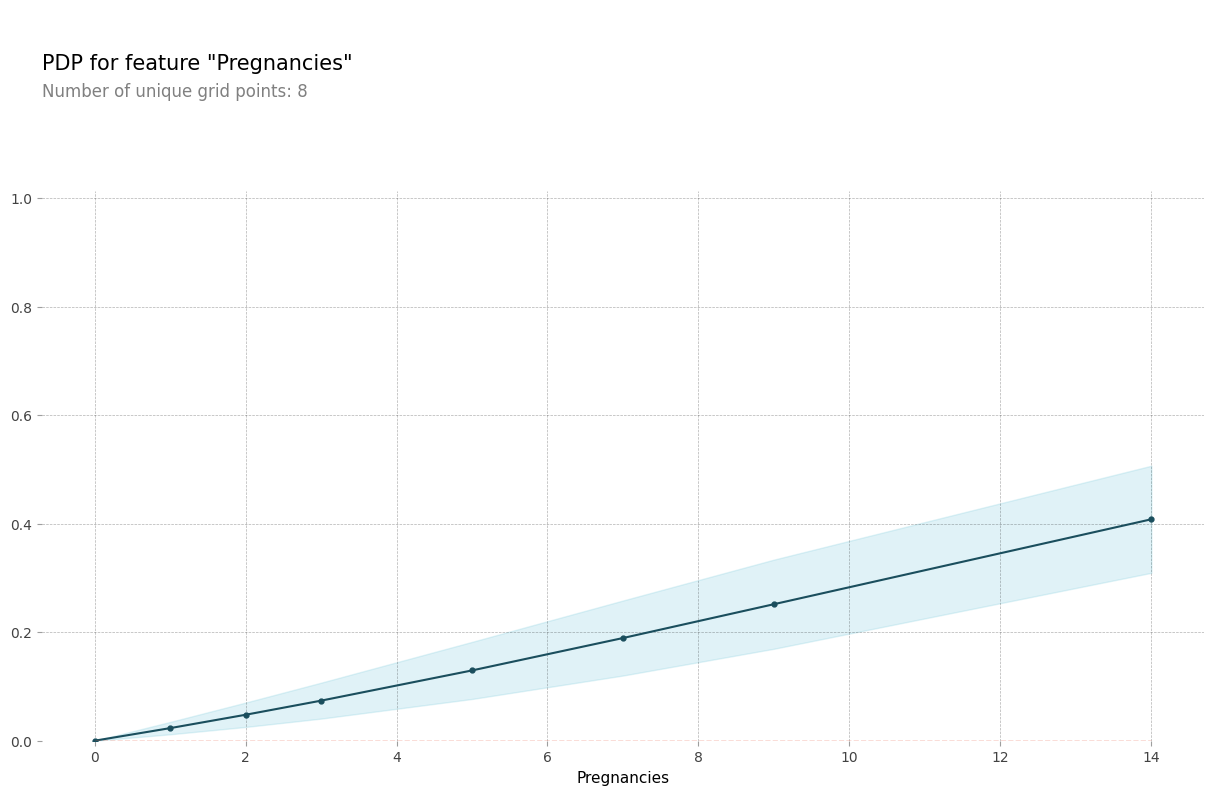

In [ ]:
# 임신횟수
PDP('Pregnancies')

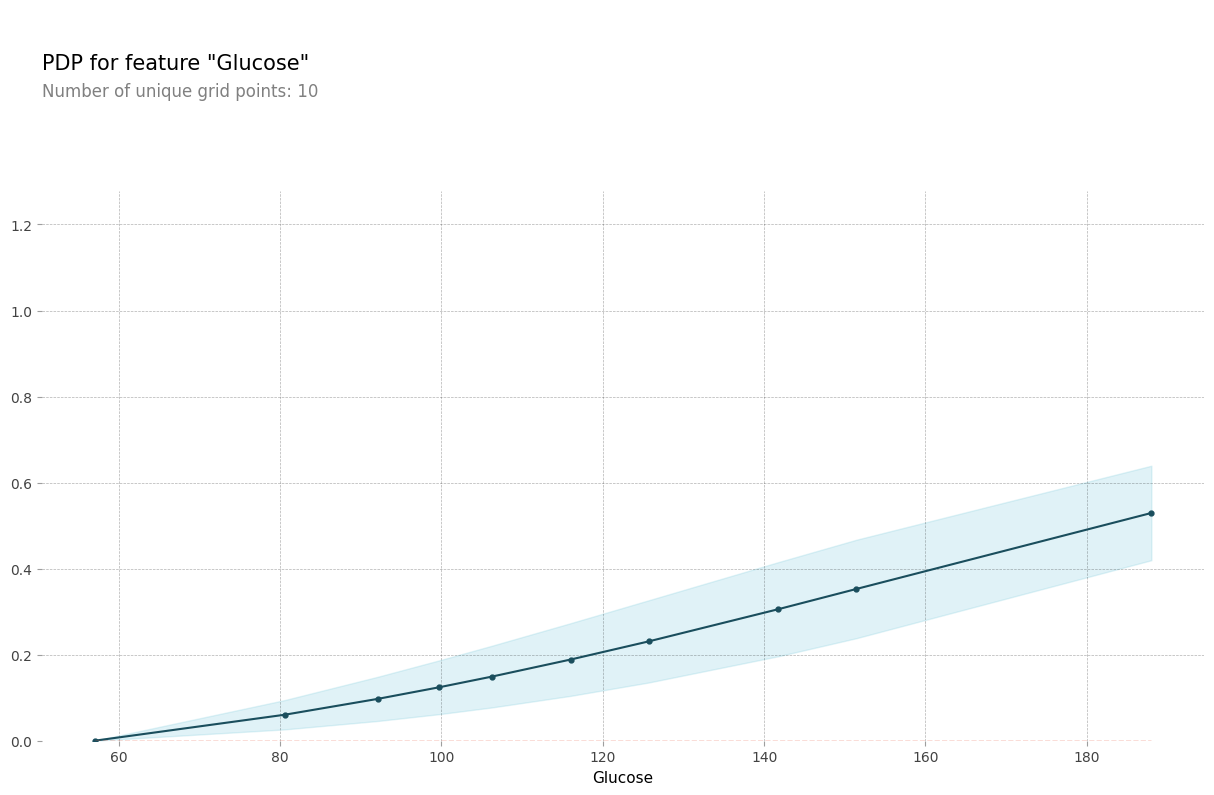

In [ ]:
# 글루코스
PDP('Glucose')

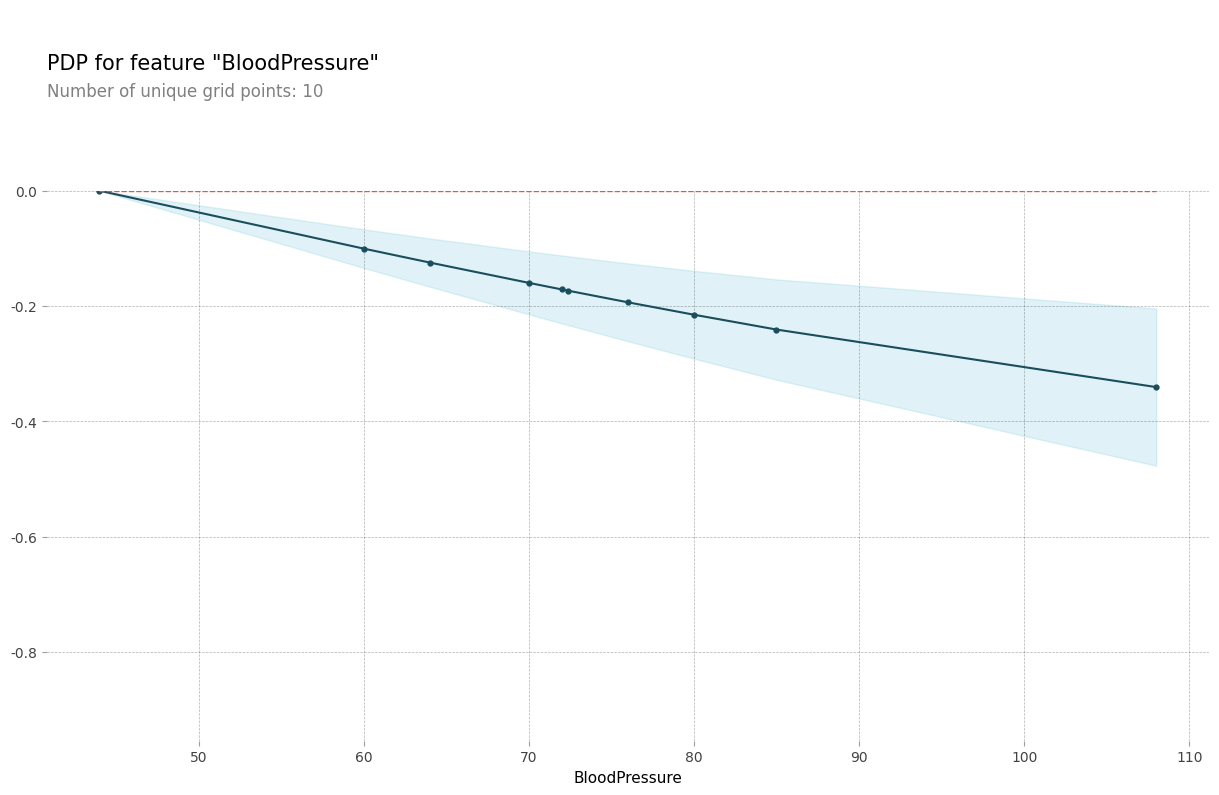

In [ ]:
# 혈압
PDP('BloodPressure')

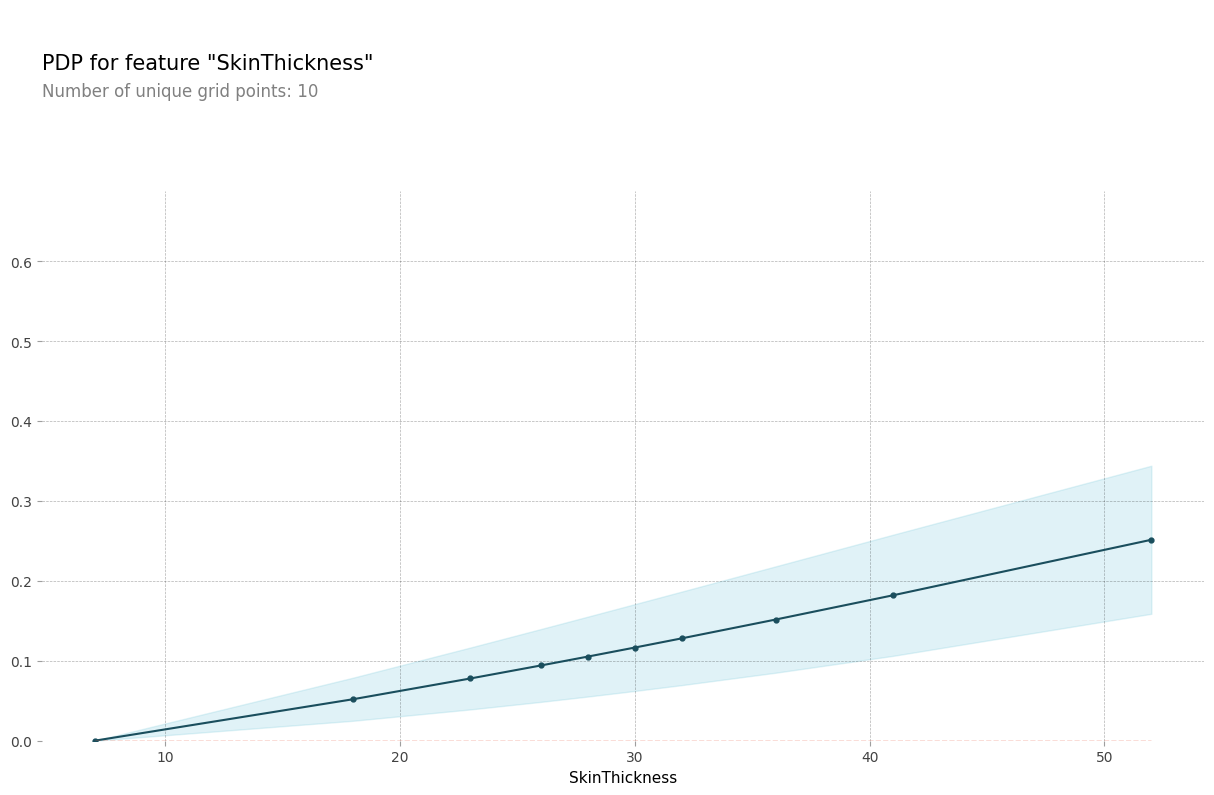

In [ ]:
# 피부두께
PDP('SkinThickness')

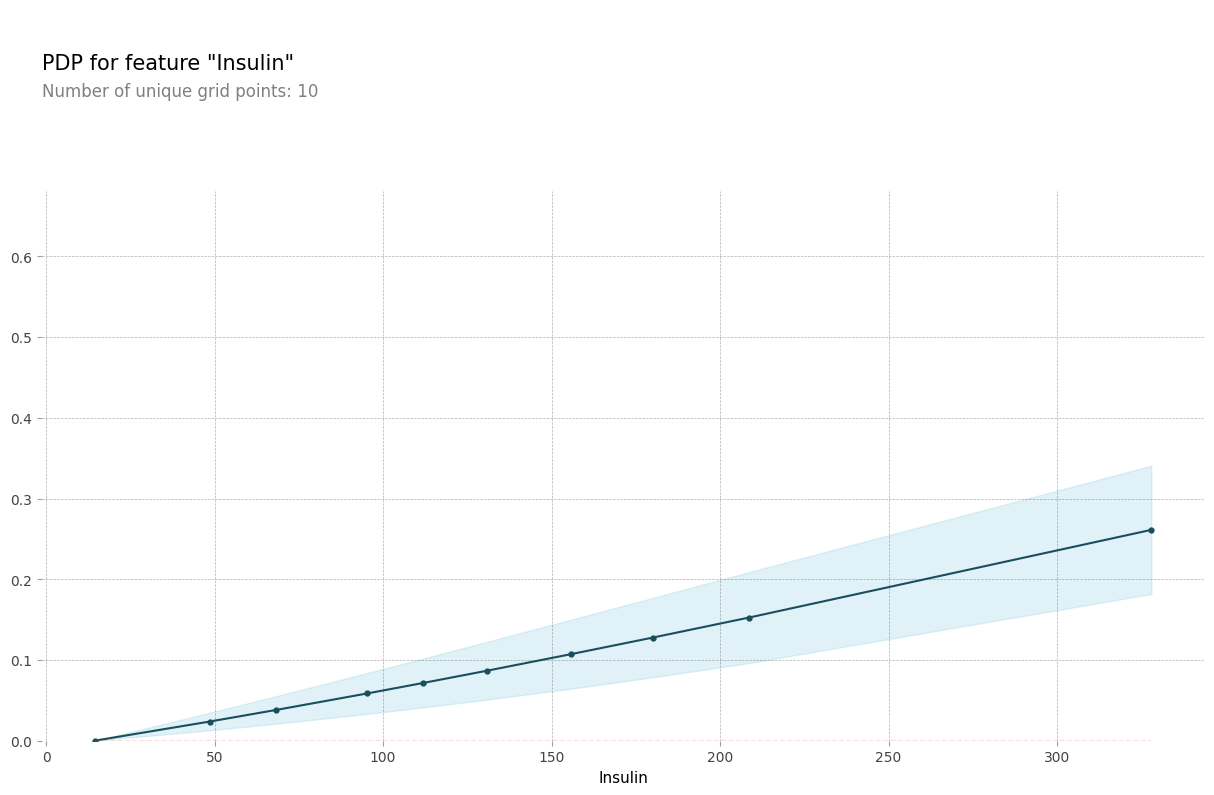

In [ ]:
# 인슐린
PDP('Insulin')

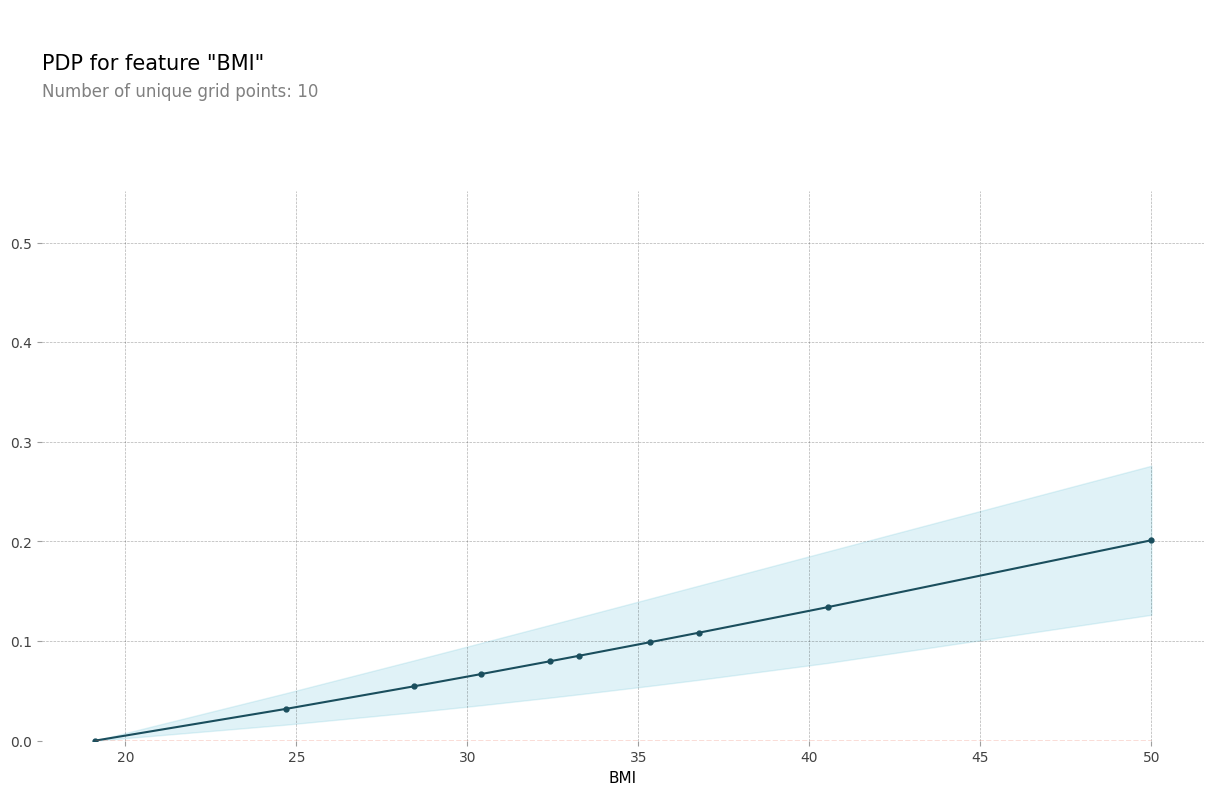

In [ ]:
# BMI
PDP('BMI')

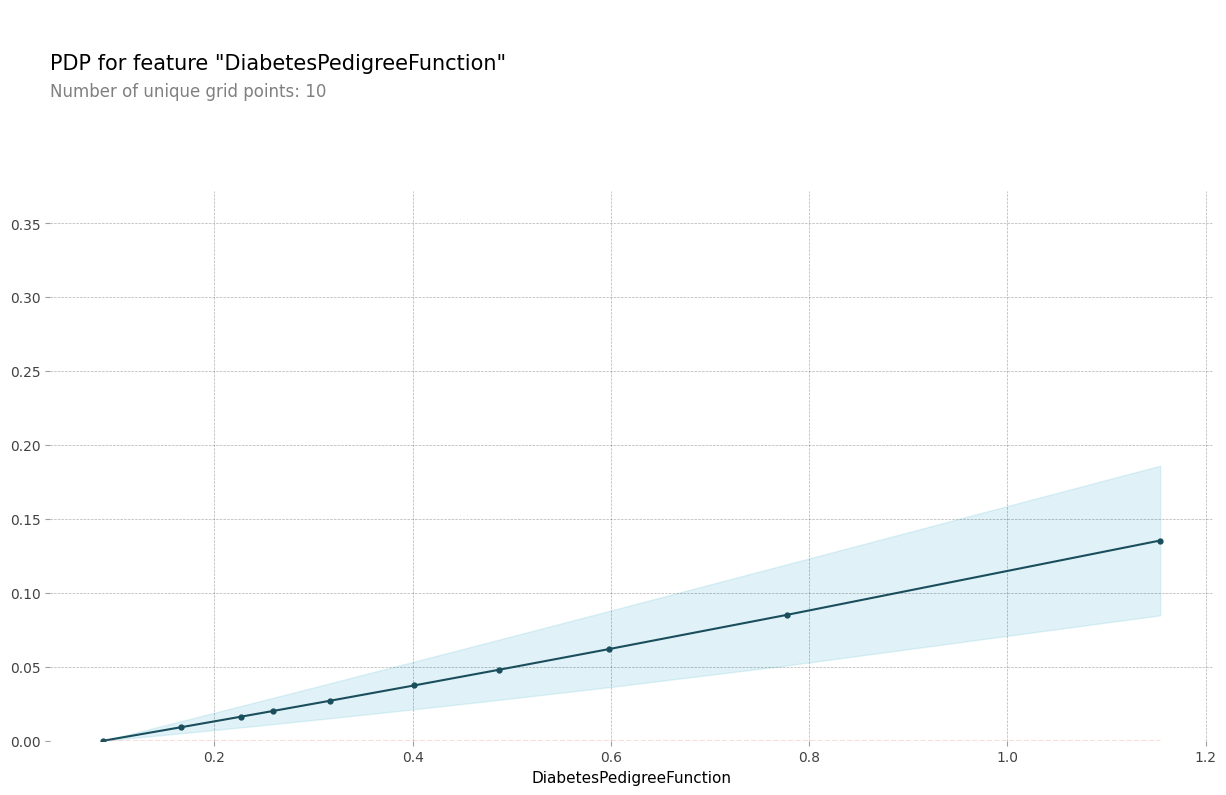

In [ ]:
# 혈통 함수
PDP('DiabetesPedigreeFunction')